## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

<h4 style = "color:black ; background-color:powderblue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> resurces i used to finish this project 

<ul>
    <li>previous quizzes
    <li>Geeksforgeeks.com
    <li>/www.w3schools.com
    <li>pandas.pydata.org/docs
    <li>github repositires to look at some concepts i couldn't grasp and the beginning   
        

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
prop=df.query('converted == 1')['converted'].count()/df.shape[0]
prop*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't match.

<h2 style= color:red> Will assign the two cases of mis-matching into two different variables</h2> 

In [6]:
case1=(df.query('group == "treatment" and landing_page != "new_page"'))['group'].count()
case1

1965

In [7]:
case2=(df.query('group != "treatment" and landing_page == "new_page"'))['group'].count()
case2

1928

In [8]:
case1+case2

3893


f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | 
                 ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
user_id=df2['user_id']
notdup=[]
dup=[]

for i in user_id:
    if i not in notdup:
        notdup.append(i)
    else:
        dup.append(i)
        break  
        
       

<h2 style= color:Magenta> The Duplicated user id 

In [14]:
dup

[773192]

c. What is the row information for the repeat **user_id**? 

In [15]:
print(df2.loc[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

<h3 style = "color:black ; background-color:powderblue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(10deg)"> I used drop duplicates with Keep = last to keep the most updated  info about the user

In [16]:
df2=df2.drop_duplicates(subset=['user_id'], keep='last');

<h4 style = "color:black ; background-color:powderblue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> just to make sure everything is fine

In [17]:
print(df2.loc[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2['converted'].sum()/len(df2)

0.11959708724499628

<h4 style = "color:black ; background-color:BlanchedAlmond ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> I have found out that since converted values are 0,1 it would be much easier to use .mean()method

In [19]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

<h4 style = "color:black ; background-color:BlanchedAlmond ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)">I will use group by to get answers for both b and c in once cell 

In [20]:
df2.groupby(['group'])['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

<strong style= color:green>Answered in the cell below

d. What is the probability that an individual received the new page?

<h4 style = "color:black ; background-color:BlanchedAlmond ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)">i will query the the landing page as new page only and divide it by the shape of indexs to get the probability   

In [21]:
df2.query('landing_page == "new_page"')['landing_page'].count()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<h4 style = "color:navy ; background-color:MediumSpringGreen ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)">By looking at the results up and conversion rates for both Control and Treatmeant groups   we can conclude:</h4>
    
 

   <ul style = "color:navy ; background-color:MediumSpringGreen ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;">
        <li>The Control grop conversion is very slighlty higher than trearmeant group conversion</li>
        <li>for control group it was 0.120386 while in treatmeat 0.118808
        <li>The difference is like 0.00157</li>
        <li> This is not significant beacuase we have to consider factors and that caused that slight difference 
        <li>we need further analysis to get more significant results     
    


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<ul style = "color:purple ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> 
     <li>H<sub>0</sub> : $p_{old}$ >= $p_{new}$ = The new page conversion is better</li>
     <li>H<sub>1</sub> : $p_{new}$ > $p_{old}$ = The old page conversion is same or better than new page </li>
         
    
        
   
    
 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

<ul style = "color:purple ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> 
     <li>H<sub>0</sub> since the null hypothesis state no difference in converted rated </li>
     <li>H<sub>$p_{new}$ will be =  $p_{old}$ regardless the page recieved</sub>  </li>

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

<h4 style = "color:purple ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> I will use groupby to get both answers for c and d

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
df2.groupby(['group', 'landing_page'])['landing_page'].count()

group      landing_page
control    old_page        145274
treatment  new_page        145310
Name: landing_page, dtype: int64

<strong style= color:green>$n_{new}$ = 145310

d. What is $n_{old}$, the number of individuals in the control group?

<strong style= color:green>$n_{old}$ = 145274

In [25]:
n_new = 145310
n_old = 145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted = new_page_converted/n_new
new_page_converted

0.11880806551510564

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted = old_page_converted/n_old
old_page_converted

0.1180803171937167

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted-old_page_converted

0.0007277483213889435

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []

for _ in range(10000):
    new_conv_sim = np.random.binomial(n_new,p_new)/n_new
    old_conv_sim = np.random.binomial(n_old,p_old)/n_old
    diff = new_conv_sim - old_conv_sim
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

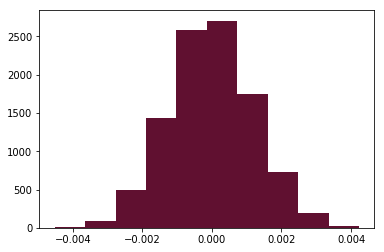

In [30]:
plt.hist(p_diffs, color = '#601030');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

<h4 style = "color:teal ; background-color:WhiteSmoke ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)">will change the p_diffs  to numpy array to compare both orginal and simulated arrays  

In [31]:
p_diffs = np.array(p_diffs)

In [32]:
org_oldp = df2.query('landing_page == "old_page"').converted.mean()
org_newp = df2.query('landing_page == "new_page"').converted.mean()

obs_diff = org_newp - org_oldp
obs_diff

-0.0015782389853555567

In [33]:
(p_diffs > obs_diff).mean()

0.90290000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

<strong style= color:green>
    <ul>
        <li>What we have computed is the proportion of bootstraping simulation that greater than actual difference observed
            <li>its scientifc name is P-value =0.90
            <li>That means the p-value is large enough for the null to be true 
            <li> we cannot discard the null hypothesis and use the new page     

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').count()[0]
n_old = df2.query('group == "control"').count()[1];
n_new = df2.query('group == "treatment"').count()[0];

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

<h5 style= color:red>
    <ol>
        <li> i used that link becuse the attached link is not working
         <li>https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<strong style= color:teal>
    <ul>
        <li>z-score(also called a standard score) gives you an idea of how far from the mean a data point from standard deviation
            <li>z-score and p-value mean they don't reject the null hypothesis 
            <li>That means we don't have confidence level the new page has more conversion rate  
            <li style = color:maroon> yes both findings agree with each other 
                

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

<strong style= 'color:purple; background-color:Wheat'> 
    since the depandent variable we are working on is binary we will use
    <li><span>&#8226;</span><strong style = "font-size:160%'; color: navy"> Logistic Regression </strong>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-18 21:16 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

<strong style= color:teal>
    <ul>
        <li>p-value is 0.1899
        <li> p-value in the a/b test was 0.90 compared to logestic reg. model which is almost 0.19
   <li> the diffrence is a causality of the diffrence between the system of the two tests one is one-tailed or one-sided which is the case in part II
   <li> while in this model it's two-sided test so the two cases have different hypothesis   
                

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

<strong style= color:navy>
    <ul>
        <li>it a good idea to consider more factors that might influence the model and thus our decesion 
        <li> simpliy beacuse in real life situations there are so many factors that might actually affect the conversion ,and these factors might not be availible for us now to consider 
   <li> on the other hand more factors to integrat to our model means more complexity and it might be a liability 
   <li> it might cause a paradox as the effect might be adverse changing from one or two factors alone to combined factors   
                

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
df3[['CA','UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [43]:
df3 = df3.drop('country',1)

In [44]:
df_final = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_final.head()

,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,
834778,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
log_mod2 = sm.Logit(df_final['converted'], df_final[['intercept', 'US', 'CA']])
results = log_mod2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-18 21:16 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9868    0.0114  -174.1736  0.0000  -2.0092  -1.9645
US           -0.0099    0.0133    -0.7458  0.4558  -0.0360   0.0161
CA           -0.0507    0.0284    -1.7863  0.0740  -0.1064   0.0049
==================================================================

"""

<h4 style = "color:purple ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> For more intercation i will between a/b page and countries i will use suggesion from the reviewer 

In [50]:
df_final['ab_US'] = df_final['US'] * df_final['ab_page']
df_final['ab_UK'] = df_final['UK'] * df_final['ab_page']
df_final['ab_CA'] = df_final['CA'] * df_final['ab_page']
df_final.head()

,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page,US_ab_page,UK_ab_page,CA_ab_page,ab_US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,,,
834778,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0,0,0
928468,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1,0,0
822059,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0,0,0
710616,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [52]:
lm3 = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page', 'US' , 'UK', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-18 21:27 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

<h1 style = "color:purple ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> Conclusion

<strong style= color:navy>
    <ul>
        <li>P-values in the last model is high which means they are not statistically significant
        <li> so it means countries didn't affect the conversion rates 
        <li> variables added didn't change the end result that the null can't shouldn't be rejected
       <li> last the new page didn't prove to be usful for increasing the conversion rate
       <li> Null Hypothesis can't be rejected     
                

<h3 style = "color:teaL ; background-color:AliceBlue ;border:2px solid Tomato;border-width: 0.5px; padding: 20px 20px 20px 20px;border-radius: 5px;transform: skew(3deg)"> final decision

<strong style= color:navy>
    <ul>
        <li>The new Page didn't prove to be useful increasing the conversion rates 
        <li> SO it's more recommended to keep the old page as the new page would cost more money in the making and marketing or distrubution process
            <li>I advise the company to do more research on other factors and may be consider the duration of the test to come up in the future with better options and decisons to increase the conversion rate 
        
                

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0